# IRIS FLOWER DATA SET


# Import the Libraries

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Reading the Dataset

In [18]:
df = pd.read_csv('IRIS.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [20]:
df1 = df.copy()    # Making the copy of the dataframe

In [22]:
df.describe()     # Describing statistical measures

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [24]:
df.shape     # Rows-150,Columns-5

(150, 5)

In [26]:
df.dtypes      # Checking the datatypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

# Data Preprocessing

In [31]:
df.isnull().sum()    # There is no null values

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [33]:
df.duplicated().sum()   # There are 3 duplicates 

3

In [35]:
df.drop_duplicates(inplace=True)    # Dropping the Duplicates

In [37]:
df.shape        # checking the shape after dropping duplicates

(147, 5)

In [39]:
df['species'].value_counts()      # checking the value counts of target variable

species
Iris-versicolor    50
Iris-virginica     49
Iris-setosa        48
Name: count, dtype: int64

# EDA

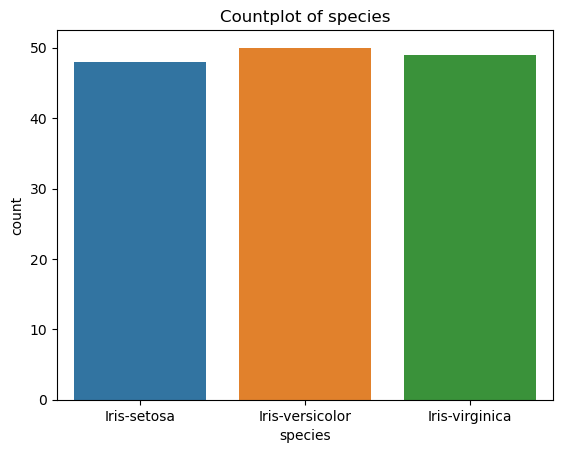

In [42]:
sns.countplot(x=df['species'])
plt.title('Countplot of species')   
plt.show() 

# Inference

# Seprating Num columns and Cat columns|

In [46]:
cat_cols = df.dtypes[df.dtypes=='object'].index
num_cols = df.dtypes[df.dtypes!='object'].index
print(cat_cols)
print(num_cols)

Index(['species'], dtype='object')
Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')


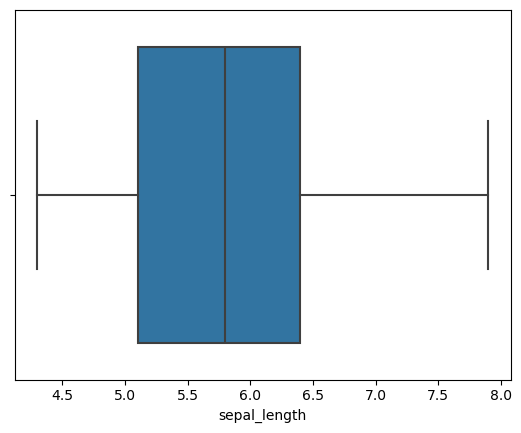

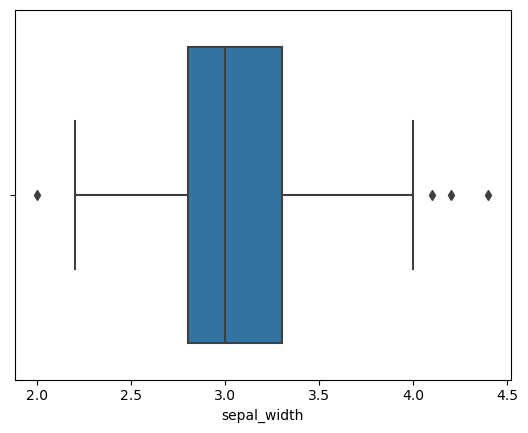

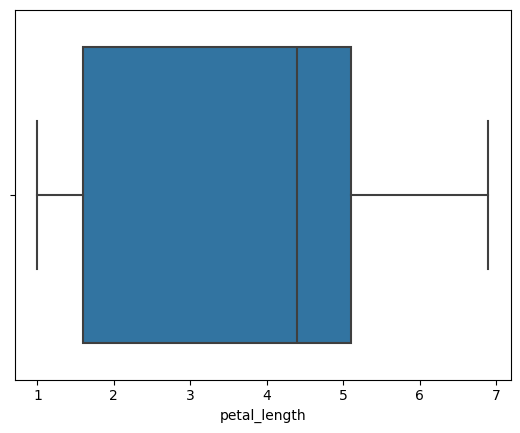

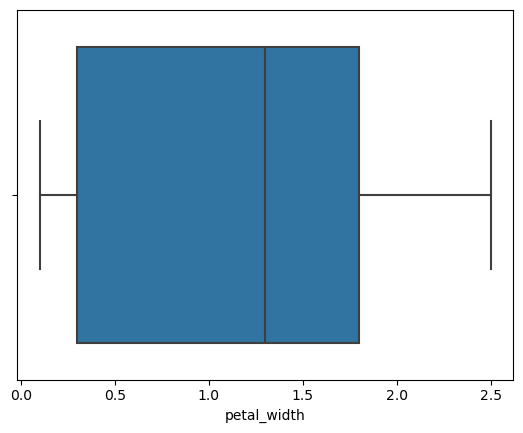

In [48]:
for i in num_cols:
    sns.boxplot(x = df[i])
    plt.show()

# Inference

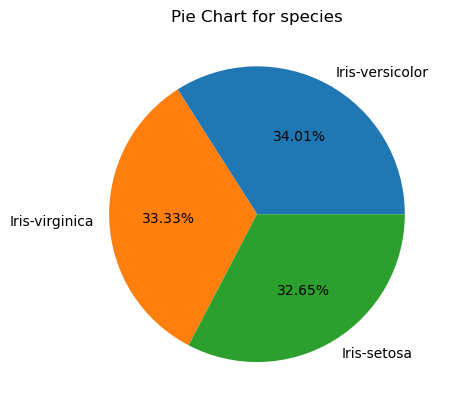

In [51]:
for i in cat_cols:
    plt.title(f'Pie Chart for {i}')
    x = df[i].value_counts()
    plt.pie(x.values, labels = x.index,autopct="%.2f%%")
    plt.show()

# Inference

# Correlation

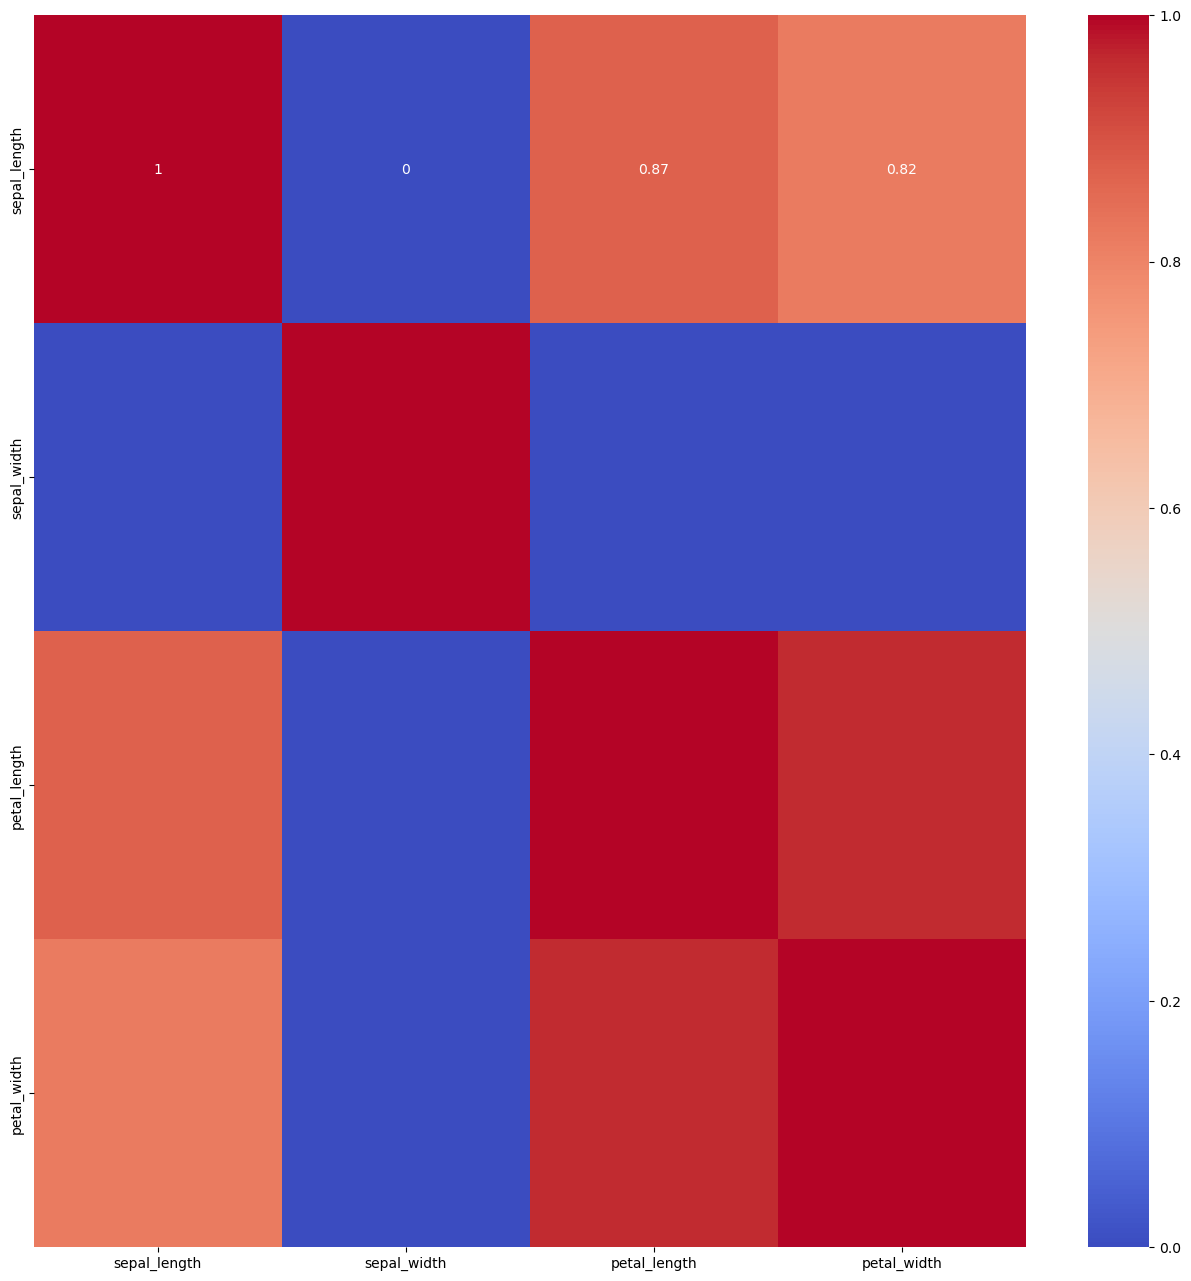

In [63]:
# Calculate correlation only for numeric columns
corr = df.select_dtypes(include='number').corr()

# Plotting the heatmap
plt.figure(figsize=(16,16))
sns.heatmap(corr.where(abs(corr) > 0.7, other=0), annot=True, cmap='coolwarm')
plt.show()


# Inference

# Handling Outliers

In [67]:
df.describe(percentiles=[0.01,0.02,0.03,0.05,0.95,0.96,0.97,0.98,0.99]).T

,count,mean,std,min,1%,2%,3%,5%,50%,95%,96%,97%,98%,99%,max
sepal_length,147.0,5.856463,0.829100,4.3,4.400,4.4,4.538,4.60,5.8,7.27,7.432,7.662,7.700,7.700,7.9
sepal_width,147.0,3.055782,0.437009,2.0,2.200,2.2,2.300,2.33,3.0,3.80,3.816,3.900,4.008,4.154,4.4
petal_length,147.0,3.780272,1.759111,1.0,1.146,1.2,1.300,1.30,4.4,6.10,6.132,6.362,6.608,6.700,6.9
petal_width,147.0,1.208844,0.757874,0.1,0.100,0.1,0.200,0.20,1.3,2.30,2.316,2.400,2.408,2.500,2.5


# Inference

# Select x and y

In [71]:
x = df.drop(['species'],axis=1)
y = df['species']
print(x.shape)
print(y.shape)

(147, 4)
(147,)


# Split data into train and test

In [74]:
from sklearn.model_selection import train_test_split

In [76]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(102, 4)
(45, 4)
(102,)
(45,)


# Evaluating the Model

In [79]:
def eval_model(model,x_train,y_train,x_test,y_test,mname):
    model.fit(x_train,y_train)
    ypred = model.predict(x_test)
    train_acc = model.score(x_train,y_train)
    test_acc = model.score(x_test,y_test)
    cm = confusion_matrix(y_test,ypred)
    cr = classification_report(y_test,ypred)
    res_df = pd.DataFrame({'Train_Acc':train_acc,'Test_Acc':test_acc},index=[mname])
    print('Confusion_Matrix\n',cm)
    print('Classification Report\n',cr)
    return res_df

In [81]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report

In [83]:
lr1 = LogisticRegression(max_iter=100000)
lr_res = eval_model(lr1,x_train,y_train,x_test,y_test,'LogReg')

Confusion_Matrix
 [[17  0  0]
 [ 0 11  1]
 [ 0  2 14]]
Classification Report
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        17
Iris-versicolor       0.85      0.92      0.88        12
 Iris-virginica       0.93      0.88      0.90        16

       accuracy                           0.93        45
      macro avg       0.93      0.93      0.93        45
   weighted avg       0.94      0.93      0.93        45



In [85]:
lr_res        # Highly overfit

,Train_Acc,Test_Acc
LogReg,0.990196,0.933333


# DT

In [88]:
dt = DecisionTreeClassifier(criterion='gini',max_depth=12,min_samples_split=15)
dt_res = eval_model(dt,x_train,y_train,x_test,y_test,'DTree')
dt_res

Confusion_Matrix
 [[17  0  0]
 [ 0 11  1]
 [ 0  0 16]]
Classification Report
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        17
Iris-versicolor       1.00      0.92      0.96        12
 Iris-virginica       0.94      1.00      0.97        16

       accuracy                           0.98        45
      macro avg       0.98      0.97      0.98        45
   weighted avg       0.98      0.98      0.98        45



,Train_Acc,Test_Acc
DTree,0.980392,0.977778


# RF

In [93]:
from sklearn.metrics import accuracy_score, classification_report

def eval_model(model, x_train, y_train, x_test, y_test, model_name='Model'):
    # Train the model
    model.fit(x_train, y_train)
    
    # Make predictions
    y_pred = model.predict(x_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    
    # Print the results
    print(f"{model_name} Accuracy: {accuracy:.2f}")
    print(f"Classification Report:\n{report}")
    
    # Optionally return the results
    return {'accuracy': accuracy, 'classification_report': report}


In [95]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the RandomForest model
rf = RandomForestClassifier(n_estimators=80, criterion='gini', max_depth=12, min_samples_split=15)

# Evaluate the model
rf_res = eval_model(rf, x_train, y_train, x_test, y_test, 'Random Forest')
rf_res


Random Forest Accuracy: 0.96
Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        17
Iris-versicolor       0.92      0.92      0.92        12
 Iris-virginica       0.94      0.94      0.94        16

       accuracy                           0.96        45
      macro avg       0.95      0.95      0.95        45
   weighted avg       0.96      0.96      0.96        45



{'accuracy': 0.9555555555555556,
 'classification_report': '                 precision    recall  f1-score   support\n\n    Iris-setosa       1.00      1.00      1.00        17\nIris-versicolor       0.92      0.92      0.92        12\n Iris-virginica       0.94      0.94      0.94        16\n\n       accuracy                           0.96        45\n      macro avg       0.95      0.95      0.95        45\n   weighted avg       0.96      0.96      0.96        45\n'}

# Knn

In [98]:
knn = KNeighborsClassifier(n_neighbors=15)
knn_res = eval_model(knn,x_train,y_train,x_test,y_test,'KNN')

KNN Accuracy: 0.96
Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        17
Iris-versicolor       0.92      0.92      0.92        12
 Iris-virginica       0.94      0.94      0.94        16

       accuracy                           0.96        45
      macro avg       0.95      0.95      0.95        45
   weighted avg       0.96      0.96      0.96        45



In [100]:
knn_res

{'accuracy': 0.9555555555555556,
 'classification_report': '                 precision    recall  f1-score   support\n\n    Iris-setosa       1.00      1.00      1.00        17\nIris-versicolor       0.92      0.92      0.92        12\n Iris-virginica       0.94      0.94      0.94        16\n\n       accuracy                           0.96        45\n      macro avg       0.95      0.95      0.95        45\n   weighted avg       0.96      0.96      0.96        45\n'}

# Inference

In [111]:
ypred_dt =  dt.predict(x_test)

In [113]:
res_df = pd.DataFrame({'Actual_y_test':y_test,'Pred':ypred_dt})        # showing actual and prediction
res_df.head(20)

,Actual_y_test,Pred
127,Iris-virginica,Iris-virginica
53,Iris-versicolor,Iris-versicolor
140,Iris-virginica,Iris-virginica
19,Iris-setosa,Iris-setosa
106,Iris-virginica,Iris-virginica
12,Iris-setosa,Iris-setosa
78,Iris-versicolor,Iris-versicolor
31,Iris-setosa,Iris-setosa
83,Iris-versicolor,Iris-virginica
9,Iris-setosa,Iris-setosa


# Summary